<a href="https://colab.research.google.com/github/nswekosk/hands-on-machine-learning-practice/blob/master/Pandas_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# `Series` objects

3 types of data structures:
* `Series` : A `Series` objecti s 1Da array, simliar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame`: A 2D table, similar to a spreadsheet (with column nmaes and row labels)
* `Panel`: A dictionary of `DataFrame`s. These are less used and I won'tt be looking deeper into these

# Creating a `Series`

In [ ]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

# Similar to a 1D `ndarray`

`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [4]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply elementwise, just like for `ndarray`s:

In [5]:
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is call * broadcasting*:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels

Each item in a `Series` object has a unique identifier called the index label. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [10]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [11]:
s2["bob"]

83

In [12]:
s2[1]

83

In [13]:
s2.loc["bob"]

83

In [14]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [15]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [16]:
surprise = pd.Series([1000, 1001, 1002, 1003]);
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [22]:
surprise_slice = surprise[2:]
#surprise_slice
try:
  surprise_slice[0]
except KeyError as e:
  print("Key error:", e)

surprise_slice.iloc[0]

Key error: 0


1002

## Init from `dict`

You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [23]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [27]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment

When an operation involves multiple `Series` objects, as `pandas` automatically aligns items by matching index labels

In [29]:
print(s2.keys())
print(s3.keys())
s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [30]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

## Init with a scalar

In [31]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [35]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a `Series`

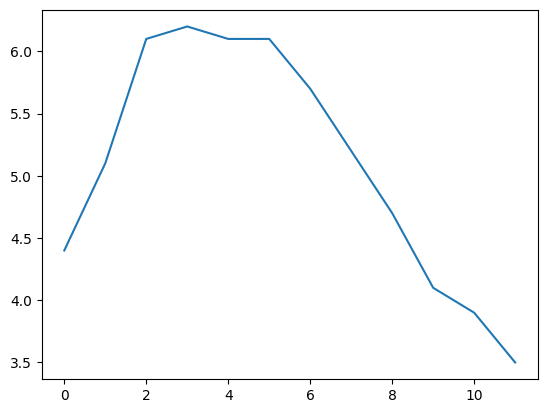

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperatures")
s7.plot()
plt.show()

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and vice versa,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using pd.date_range(). This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th at 2016 at 5:30 pm.

In [37]:
dates = pd.date_range("2016/10/29 5:30pm", periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [40]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

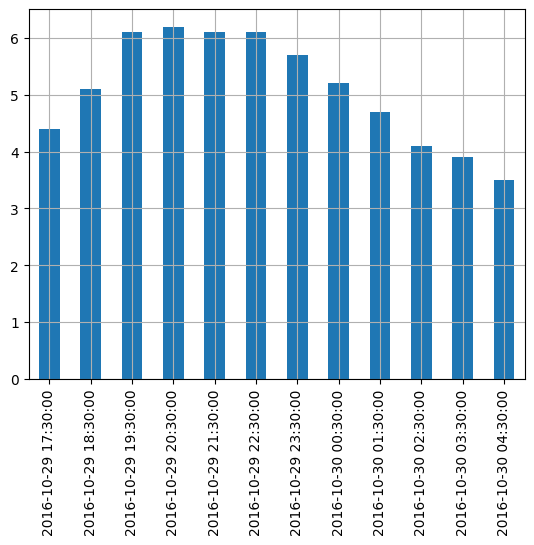

In [41]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## Resampling

In [42]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [43]:
temp_series_freq_2H = temp_series_freq_2H.mean()

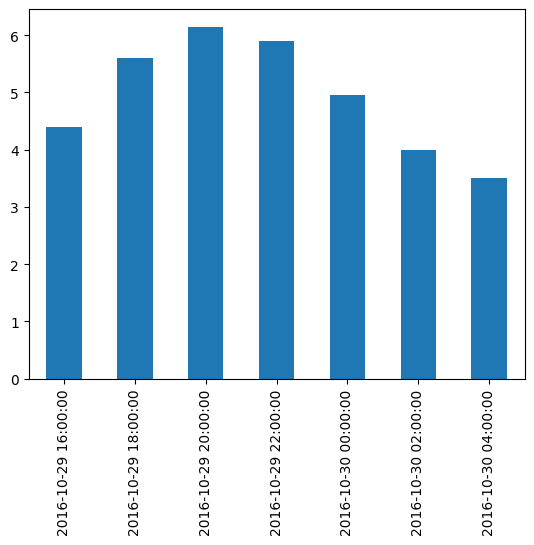

In [44]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

In [47]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [48]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation

In [49]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [50]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

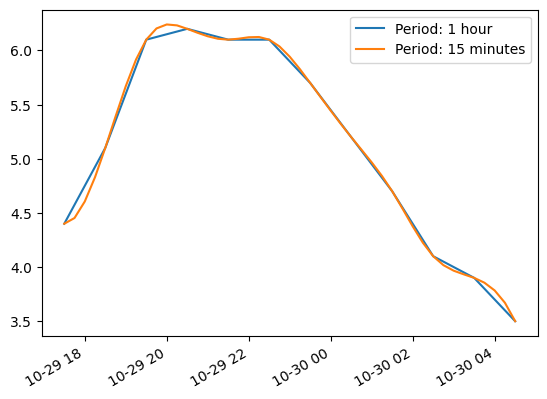

In [51]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## TImezones

In [52]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

In [53]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

In [54]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

In [55]:
try:
  temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
  print(type(e))
  print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


In [56]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

## Periods

In [57]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

In [59]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')